[*********************100%%**********************]  26 of 27 completed

1 Failed download:
['LBS=F']: Exception("%ticker%: Period '20d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


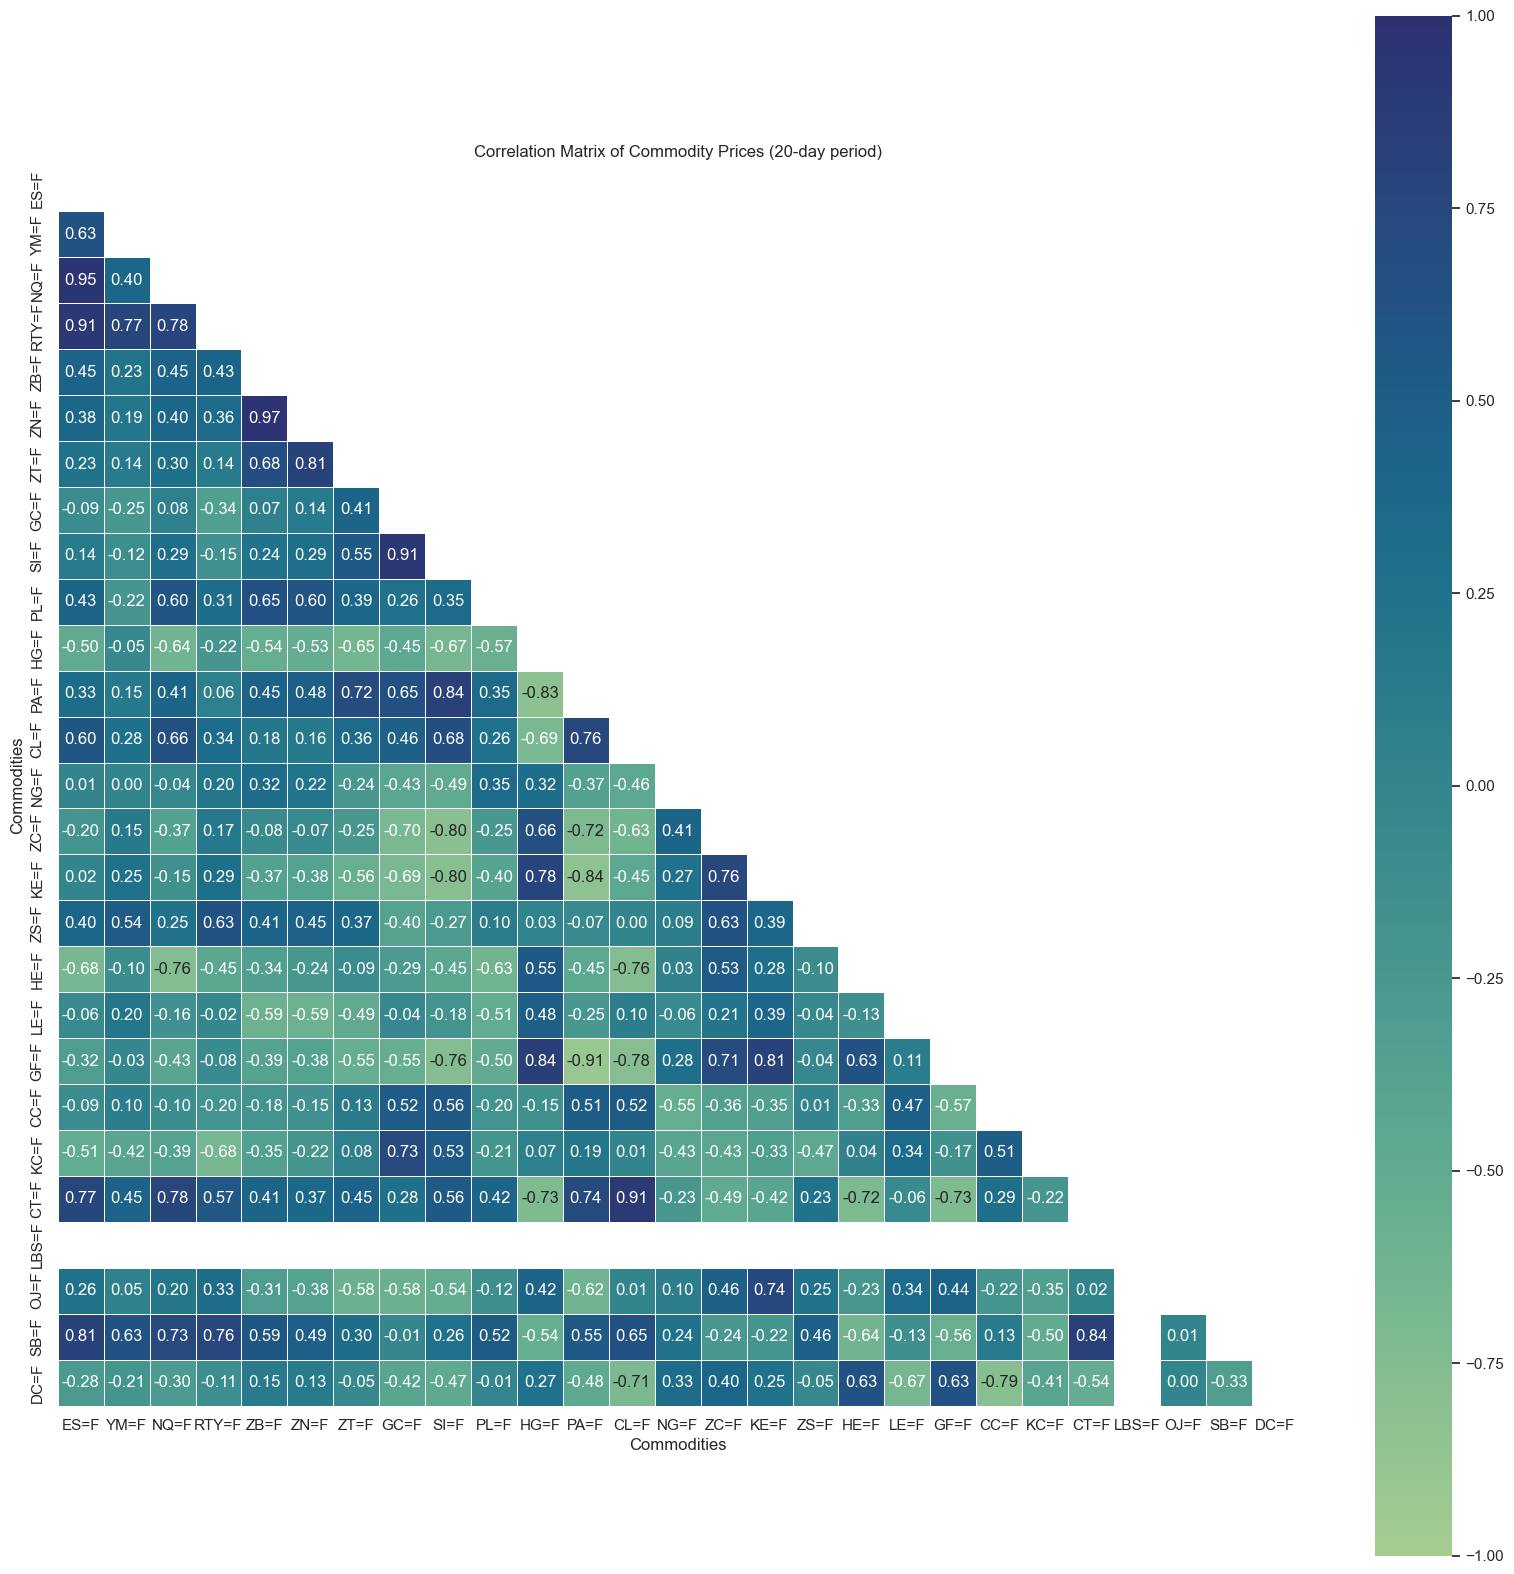

In [22]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# define the list of tickers
tickers = ['ES=F', 'YM=F', 'NQ=F', 'RTY=F', 'ZB=F', 'ZN=F', 'ZN=F', 'ZT=F', 'GC=F', 'SI=F', 'PL=F', 'HG=F', 'PA=F', 'CL=F', 'NG=F', 'ZC=F', 'KE=F', 'ZS=F', 'HE=F', 'LE=F', 'GF=F', 'CC=F', 'KC=F', 'CT=F', 'LBS=F', 'OJ=F', 'SB=F', 'DC=F']

# download historical stock price data from Yahoo Finance
data = yf.download(tickers, period='20d', group_by='ticker')

# extract the closing prices
close_prices = pd.DataFrame()
for ticker in tickers:
    close_prices[ticker] = data[ticker]['Close']

# compute the correlation matrix
corr_matrix = close_prices.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# create a heatmap of the correlation matrix using Seaborn
sns.set(style='white')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="crest", vmin=-1, mask=mask, vmax=1, ax=ax, square=True, linewidths=.5, fmt='.2f')

# set the axis labels and title
ax.set_xlabel('Commodities')
ax.set_ylabel('Commodities')
ax.set_title('Correlation Matrix of Commodity Prices (20-day period)')

# display the plot
plt.show()